In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

**목표**

날씨와 주가와의 상관관계를 여러 데이터를 이용해 구한다.

-지진과 지진 관련주와의 상관관계

-폭염과 냉방장치 관련주와의 상관관계(+학습모델)

-일조량 및 기압과 주식 수익률과의 상관관계

**기상데이터 가져오기**

일반 기상상황과 지진정보를 가져온다.

https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

In [2]:
df_weather = pd.read_csv('https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%A2%85%ED%95%A9%EC%9D%BC%EA%B8%B0%EC%83%81%ED%83%9C.csv', encoding='CP949')
df_weather

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),1시간 최다강수량(mm),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),평균 상대습도(%),평균 현지기압(hPa),1시간 최다일사 시각(hhmi),합계 일사량(MJ/m2),평균 지면온도(°C),안개 계속시간(hr)
0,101,춘천,2017-11-01,11.0,6.2,16.5,NaN,NaN,NaN,3.4,0.8,83.1,1011.9,1200.0,5.35,10.5,NaN
1,101,춘천,2017-11-02,12.9,9.6,16.8,NaN,NaN,3.7,1.6,0.4,91.3,1009.3,1400.0,3.64,13.4,NaN
2,101,춘천,2017-11-03,12.8,7.1,17.6,NaN,NaN,2.3,4.5,1.8,70.4,1009.6,1200.0,8.83,12.8,NaN
3,101,춘천,2017-11-04,7.4,1.7,13.1,NaN,NaN,NaN,4.2,1.3,65.0,1018.8,1100.0,10.46,7.6,NaN
4,101,춘천,2017-11-05,5.2,-1.9,14.6,NaN,NaN,NaN,2.9,0.8,76.5,1019.8,1200.0,12.27,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,138,포항,2021-12-15,8.1,2.7,15.3,NaN,NaN,NaN,4.6,2.0,58.6,1020.7,1200.0,9.96,6.2,NaN
4526,138,포항,2021-12-16,8.2,5.8,10.7,1.83,NaN,0.3,3.2,2.0,70.3,1017.2,1400.0,2.48,6.7,NaN
4527,138,포항,2021-12-17,1.4,-5.4,8.2,NaN,NaN,NaN,11.4,4.7,30.0,1018.4,1200.0,10.96,2.9,NaN
4528,138,포항,2021-12-18,-2.6,-8.3,3.1,NaN,NaN,NaN,6.2,3.2,35.1,1024.6,1200.0,11.53,-1.3,NaN


In [3]:
df_quake = pd.read_csv('https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%A7%80%EC%A7%84%EC%A0%95%EB%B3%B4.csv', encoding='CP949')
df_quake

,시간,규모,진앙(km),위도,경도,위치
0,2012-01-01 19:40:31,2.0,0,39.02,125.82,북한 평양 동쪽 6km 지역
1,2012-01-16 03:03:54,2.2,17,36.79,128.75,경북 안동시 북쪽 25km 지역
2,2012-01-19 15:43:00,2.7,13,38.51,126.23,북한 황해북도 평산 북서쪽 24km 지역
3,2012-01-24 02:41:53,2.2,15,37.12,125.96,인천 옹진군 덕적도 서남서쪽 20km 해역
4,2012-02-19 20:21:29,2.7,17,35.13,129.89,울산 동구 남동쪽 59km 해역
...,...,...,...,...,...,...
1041,2021-11-16 11:57:58,2.1,18,35.06,125.06,전남 신안군 흑산도 북서쪽 54km 해역
1042,2021-11-16 20:53:24,2.1,8,34.50,125.90,전남 진도군 서쪽 33km 해역
1043,2021-11-17 01:39:11,2.9,19,35.66,129.75,울산 동구 동북동쪽 35km 해역
1044,2021-11-19 02:35:08,2.2,11,33.85,124.77,전남 신안군 흑산도 남남서쪽 109km 해역


**웹크롤링 함수 생성**

https://hleecaster.com/python-web-crawling-with-beautifulsoup/

https://white-hacker.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%A3%BC%EC%8B%9D-python-%EB%84%A4%EC%9D%B4%EB%B2%84-%EC%8B%9C%EC%84%B8-%EC%A0%95%EB%B3%B4-%ED%81%AC%EB%A1%A4%EB%A7%81-%EC%95%88%EB%90%A8-%ED%98%84%EC%83%81-%ED%95%B4%EA%B2%B0%EB%B0%A9%EB%B2%95 (네이버 주가 크롤링 문제)

In [4]:
import requests
from bs4 import BeautifulSoup
 
# 함수를 정의한다 : 종목코드를 스트링 형태로 집어넣으면, 300페이지(대략 2010년도)부터 현재까지의 일별 종가와 거래량을 테이블에 담는다.
def getStock(code) : 

  # 반환할 데이터프레임을 만든다.
  df_temp = pd.DataFrame({'date':[], 'sise':[], 'trading':[]})

  # 이 밑부터는 페이지를 1부터 원하는 만큼 뽑으면 된다. 대충 300까지 가면 2010년도부터 확인 가능하다.
  for i in range(300):

    # 주소 따라가서 html 가져오기
    url = f"http://finance.naver.com/item/sise_day.nhn?code={code}&page={i+1}"
    req = requests.get(url, headers={'User-agent': 'Mozilla/5.0'})
    html = BeautifulSoup(req.text, "lxml")

    # 테이블만 똑 떼와서, 내부 행 전부 가져오기
    arr = html.table.find_all("tr")

    # 원하는 정보는 2~6, 10~14까지 있다.
    core = arr[2:7]
    for j in range(10,15):
      core.append(arr[j])

    
    # 코어를 돌면서, 필요한 값만 뽑는다.
    for c in core : 
      tempfind = c.find_all("td")

      # 각 코어 당 날짜, 종가, 거래량 데이터만 뽑는다. (0,1,6번 인덱스)
      
      inserting = {'date':tempfind[0].get_text(), 'sise':tempfind[1].get_text(), 'trading':tempfind[6].get_text()}

      # 데이터프레임에 추가한다.
      df_temp = df_temp.append(inserting, ignore_index = True)

  # 데이터프레임 반환.
  return df_temp

#print(getStock('005930')) # 삼전 코드
#print(getStock('101670')) # 지진 관련주

**웹크롤링한 데이터 저장**

웹크롤링 시, 종목 당 아나콘다로는 40초, colab로는 5분가량 걸린다. 이걸 여러번 하기 때문에, 시연 시에는 아나콘다로 하거나, 빠른 진행이 필요하다면 github에서 이미 크롤링해놓은 자료를 사용할 것.
사실, colab에선 저장마저 잘 안된다.

https://tariat.tistory.com/583

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221644407877(데이터 뒤집기)

https://disclosure-reader.tistory.com/854(지진 관련주)

https://stockstalker.co.kr/air-conditioner/(에어컨 관련주)

https://plus.hankyung.com/apps/newsinside.view?aid=201912185699A&category=AA006&sns=y (국내 유망 주식)



In [6]:
df_profit_1 = getStock('005930').loc[::-1].reset_index(drop=True) # 삼성전자(수익파악용)
df_profit_1.to_csv("D:\\삼성전자_수익용.csv", index = False)

df_profit_2 = getStock('035720').loc[::-1].reset_index(drop=True) # 카카오(수익파악용)
df_profit_2.to_csv("D:\\카카오_수익용.csv", index = False)

df_profit_3 = getStock('009150').loc[::-1].reset_index(drop=True) # 삼성전기(수익파악용)
df_profit_3.to_csv("D:\\삼성전기_수익용.csv", index = False)

df_quake_1 = getStock('101670').loc[::-1].reset_index(drop=True) # 코리아에스이(지진 관련주 : 토목용 특수자재 제작, 사면안정공법)
df_quake_1.to_csv("D:\\코리아에스이_지진.csv", index = False)

df_quake_2 = getStock('054540').loc[::-1].reset_index(drop=True) # 삼영엠텍(지진 관련주 : 구조물 구조재, 교량건설)
df_quake_2.to_csv("D:\\삼영엠텍_지진.csv", index = False)

df_quake_3 = getStock('018000').loc[::-1].reset_index(drop=True) # 유니슨(지진 관련주 : 내진설계된 풍력발전기)
df_quake_3.to_csv("D:\\유니슨_지진.csv", index = False)

df_hot_1 = getStock('037070').loc[::-1].reset_index(drop=True) # 파세코(폭염 관련주 : 1인가구용 창문형 에어컨)
df_hot_1.to_csv("D:\\파세코_폭염.csv", index = False)

df_hot_2 = getStock('002700').loc[::-1].reset_index(drop=True) # 신일전자(폭염 관련주 : 선풍기 시장 점유율 1위)
df_hot_2.to_csv("D:\\신일전자_폭염.csv", index = False)

df_hot_3 = getStock('060570').loc[::-1].reset_index(drop=True) # 드림어스컴퍼니(폭염 관련주 : 휴대용 선풍기, 공기순환기기)
df_hot_3.to_csv("D:\\드림어스컴퍼니_폭염.csv", index=False)


**(웹크롤링이 오래 걸리는 상황에선 2021.11.29. ~ 2021.11.30. 기준의 이 데이터 활용할 것)**

특히 거래량에 1000단위 구분쉼표가 있으므로, 만약 웹크롤링을 시연할 시간이 주어진다 하더라도 이 구문은 시행한다.

단 이 구문은 현재 웹크롤링과는 별개로 이미 완성된 깃허브의 파일을 가져오는 것이기 때문에, 웹크롤링을 시연했다면 그 결과 파일은 따로 켜서 보여야 할 것이다.

https://rfriend.tistory.com/250

https://rfriend.tistory.com/463 (1000단위 구분기호 제거)

In [5]:
df_profit_1 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%88%98%EC%9D%B5%EC%9A%A9.csv", thousands = ',')
df_profit_2 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%B9%B4%EC%B9%B4%EC%98%A4_%EC%88%98%EC%9D%B5%EC%9A%A9.csv", thousands = ',')
df_profit_3 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%82%BC%EC%84%B1%EC%A0%84%EA%B8%B0_%EC%88%98%EC%9D%B5%EC%9A%A9.csv", thousands = ',')
df_quake_1 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%BD%94%EB%A6%AC%EC%95%84%EC%97%90%EC%8A%A4%EC%9D%B4_%EC%A7%80%EC%A7%84.csv", thousands = ',')
df_quake_2 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%82%BC%EC%98%81%EC%97%A0%ED%85%8D_%EC%A7%80%EC%A7%84.csv", thousands = ',')
df_quake_3 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%9C%A0%EB%8B%88%EC%8A%A8_%EC%A7%80%EC%A7%84.csv", thousands = ',')
df_hot_1 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%ED%8C%8C%EC%84%B8%EC%BD%94_%ED%8F%AD%EC%97%BC.csv", thousands = ',')
df_hot_2 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EC%8B%A0%EC%9D%BC%EC%A0%84%EC%9E%90_%ED%8F%AD%EC%97%BC.csv", thousands = ',')
df_hot_3 = pd.read_csv("https://raw.githubusercontent.com/lhwlord/Data_Analysis_project/main/%EB%93%9C%EB%A6%BC%EC%96%B4%EC%8A%A4%EC%BB%B4%ED%8D%BC%EB%8B%88_%ED%8F%AD%EC%97%BC.csv", thousands = ',')

**각 데이터의 평균 구하기**

날씨와 주제별 주식종목들은 모두 개별 편차를 메꾸기 위해 2~3개의 소스를 가져왔다. 따라서 이들의 평균을 구해야 한다.

먼저 일반 기상상황을 처리한다.

이 데이터는 일별 정리가 되어있으므로, 지역별 평균만 구하면 된다. 그 전에, 당장의 프로세싱에 필요없는 열을 제거한다.

In [6]:
df_weather_process = df_weather.groupby('일시').mean()
df_weather_process.drop(['지점','최저기온(°C)','일강수량(mm)','강수 계속시간(hr)','1시간 최다일사 시각(hhmi)','1시간 최다강수량(mm)','최대 풍속(m/s)','안개 계속시간(hr)', '평균 지면온도(°C)'],axis=1,inplace=True)
df_weather_process
# 일반 기상상황 처리 완료.

,평균기온(°C),최고기온(°C),평균 풍속(m/s),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2)
일시,,,,,,
2017-11-01,13.500000,18.433333,1.733333,68.933333,1014.100000,4.550000
2017-11-02,14.766667,18.533333,1.366667,78.200000,1011.466667,3.306667
2017-11-03,13.533333,18.733333,2.566667,66.133333,1012.166667,6.440000
2017-11-04,8.533333,13.700000,2.033333,56.966667,1021.000000,6.930000
2017-11-05,8.266667,15.666667,1.700000,58.133333,1021.633333,9.060000
...,...,...,...,...,...,...
2021-12-15,6.633333,11.733333,1.533333,77.900000,1013.600000,6.013333
2021-12-16,5.966667,8.966667,1.533333,76.833333,1011.533333,4.503333
2021-12-17,-2.833333,5.433333,4.233333,40.166667,1014.933333,10.583333


이번엔 지진 데이터를 처리한다.

간단하게 규모만 볼 것이므로, 나머지 열은 제거한 상태로 시작한다.

또한 데이터가 없는 날짜도 있는데, 이건 지진이 크게 발생한 날짜의 범위만 따로 뽑고, 그 상태에서 빈 날짜를 결측값으로 처리하는 식으로 한다.

https://rfriend.tistory.com/383 (그룹별로 묶어 통계내기)

https://pythonq.com/so/python/23921 (0을 null값으로 바꾸기)


In [7]:
for i in range(len(df_quake)) : 
    df_quake.loc[i, '시간'] = df_quake.loc[i, '시간'].split(' ')[0] # 날짜 이하 값 제거
df_quake

,시간,규모,진앙(km),위도,경도,위치
0,2012-01-01,2.0,0,39.02,125.82,북한 평양 동쪽 6km 지역
1,2012-01-16,2.2,17,36.79,128.75,경북 안동시 북쪽 25km 지역
2,2012-01-19,2.7,13,38.51,126.23,북한 황해북도 평산 북서쪽 24km 지역
3,2012-01-24,2.2,15,37.12,125.96,인천 옹진군 덕적도 서남서쪽 20km 해역
4,2012-02-19,2.7,17,35.13,129.89,울산 동구 남동쪽 59km 해역
...,...,...,...,...,...,...
1041,2021-11-16,2.1,18,35.06,125.06,전남 신안군 흑산도 북서쪽 54km 해역
1042,2021-11-16,2.1,8,34.50,125.90,전남 진도군 서쪽 33km 해역
1043,2021-11-17,2.9,19,35.66,129.75,울산 동구 동북동쪽 35km 해역
1044,2021-11-19,2.2,11,33.85,124.77,전남 신안군 흑산도 남남서쪽 109km 해역


In [8]:
df_quake.drop(['위도', '경도'], axis=1, inplace=True)



df_quake['진앙(km)'].replace(r'^\s*$', np.nan, regex=True, inplace=True) # 결측값 대신 공백이 들어간 진앙의 셀을 널값으로 변경

# 널값인 행만을 기억한다.
mask = df_quake['진앙(km)'].isna()

# 결측값이 아닌 값만 따로 빼서 평균을 구한다.
origin = 0
count = 0
for i in range(len(df_quake)):
    if(not mask[i]) : 
        count = count + 1
        origin = origin + int(df_quake.loc[i]['진앙(km)'])

if(count > 0) : origin = origin / count

# 이제 진앙의 결측값을 해당 평균으로 채운다.
df_quake['진앙(km)'] = df_quake['진앙(km)'].fillna(origin)


# 공백에 의해 진앙 열이 문자열 타입이라서, 이대로 두면 그루핑에 의해 사라진다. 따라서 결측값도, 공백도 없는 진앙 열을 만들었으니 숫자형으로 형변환.
df_quake['진앙(km)'] = pd.to_numeric(df_quake['진앙(km)']) 


df_quake_process = df_quake.groupby('시간').mean()

df_quake_process.rename(columns={'진앙(km)':'진앙'}, inplace=True)

# 지진 데이터 처리 완료

In [9]:
print(df_quake_process.loc['2012-10-01']) # 결측값이 있던 곳
print()
df_quake_process

규모     2.400000
진앙    12.320463
Name: 2012-10-01, dtype: float64



,규모,진앙
시간,,
2012-01-01,2.0,0.0
2012-01-16,2.2,17.0
2012-01-19,2.7,13.0
2012-01-24,2.2,15.0
2012-02-19,2.7,17.0
...,...,...
2021-11-12,2.1,8.0
2021-11-16,2.1,13.0
2021-11-17,2.9,19.0


**데이터 표시하기**

이제, 처리한 데이터를 여러 차트를 이용해서 표시하도록 한다.

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-pack

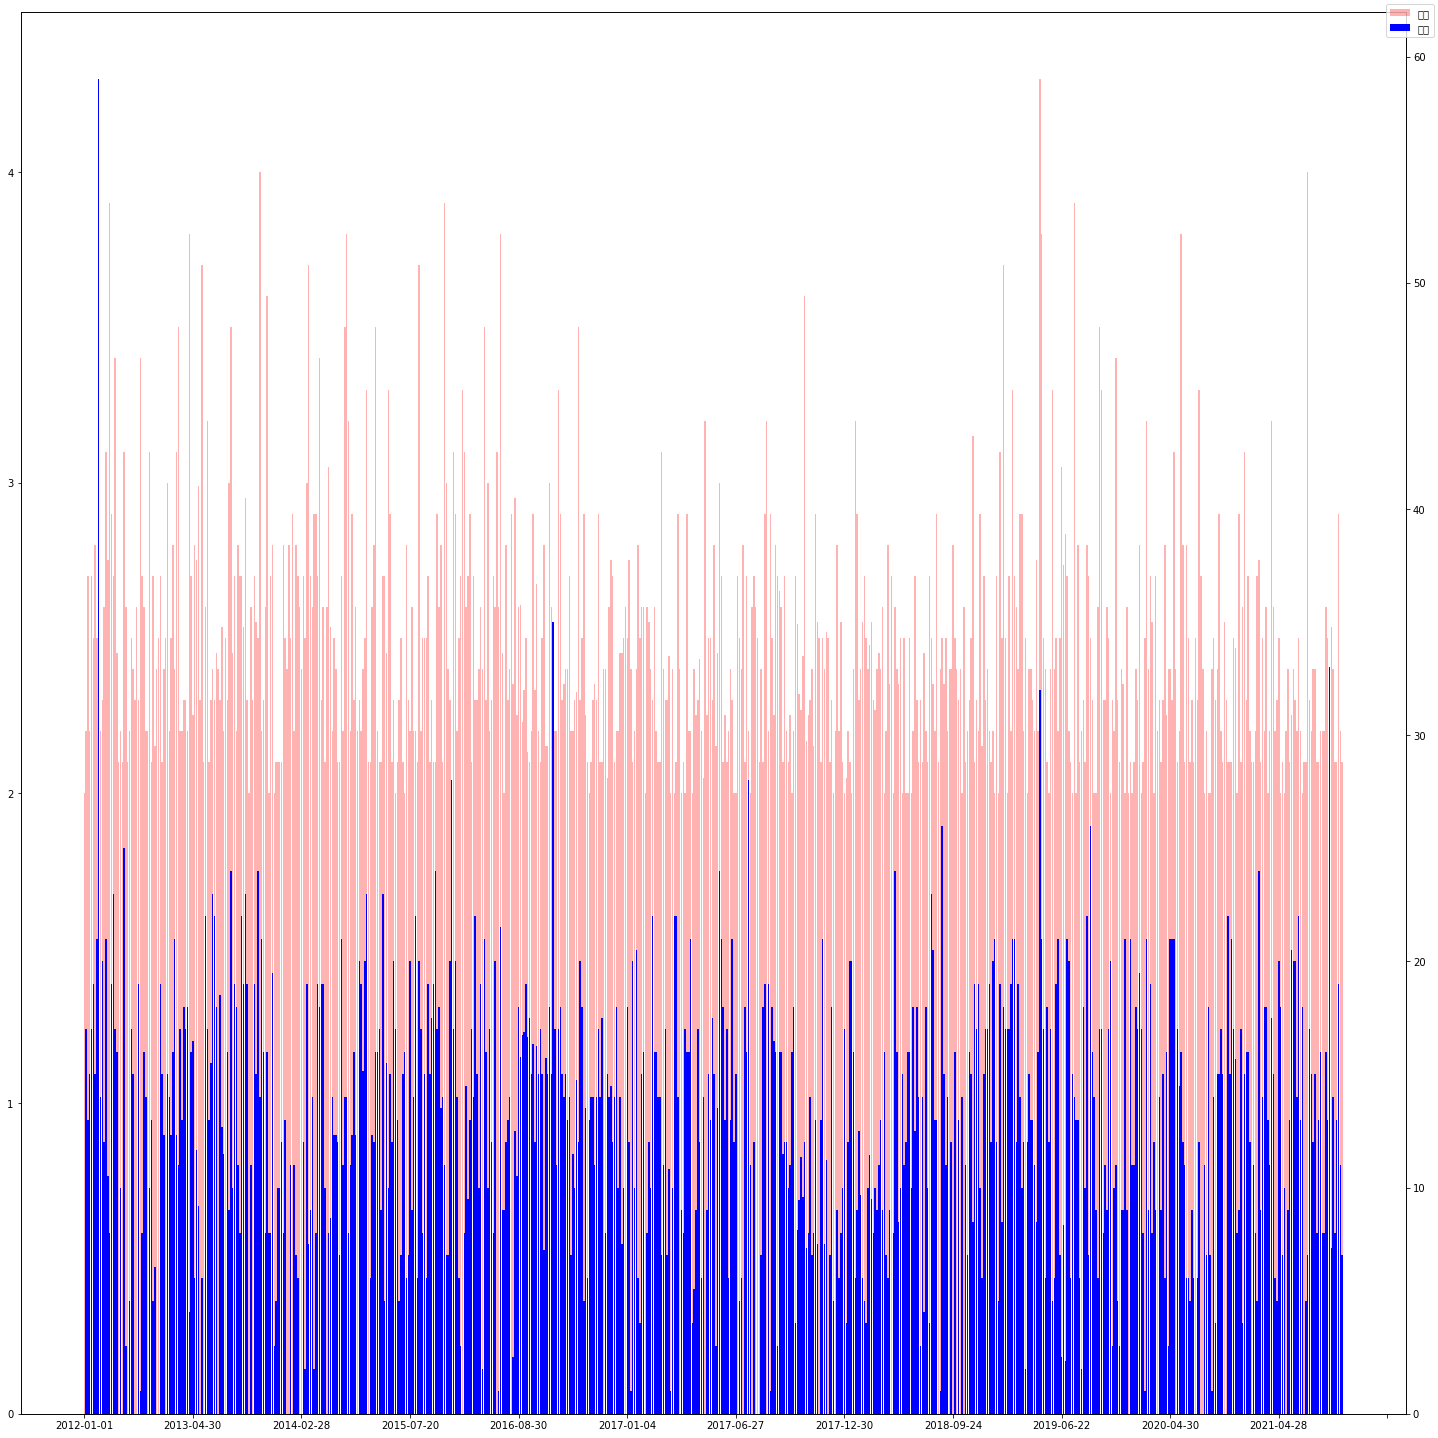

In [10]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 지진 차트 생성


fig, ax1 = plt.subplots()
ax1.bar(df_quake_process.index, df_quake_process.규모, color='red', label='규모', alpha=0.3)
ax1.tick_params(axis='y')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(60))

ax2 = ax1.twinx()
ax2.bar(df_quake_process.index, df_quake_process.진앙, color='blue', label = '진앙')
ax2.tick_params(axis='y')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(60))


fig.set_size_inches(20, 20)
fig.tight_layout()
fig.legend()
plt.show()

https://pythonq.com/so/python/1706317 (x축 빈도설정)

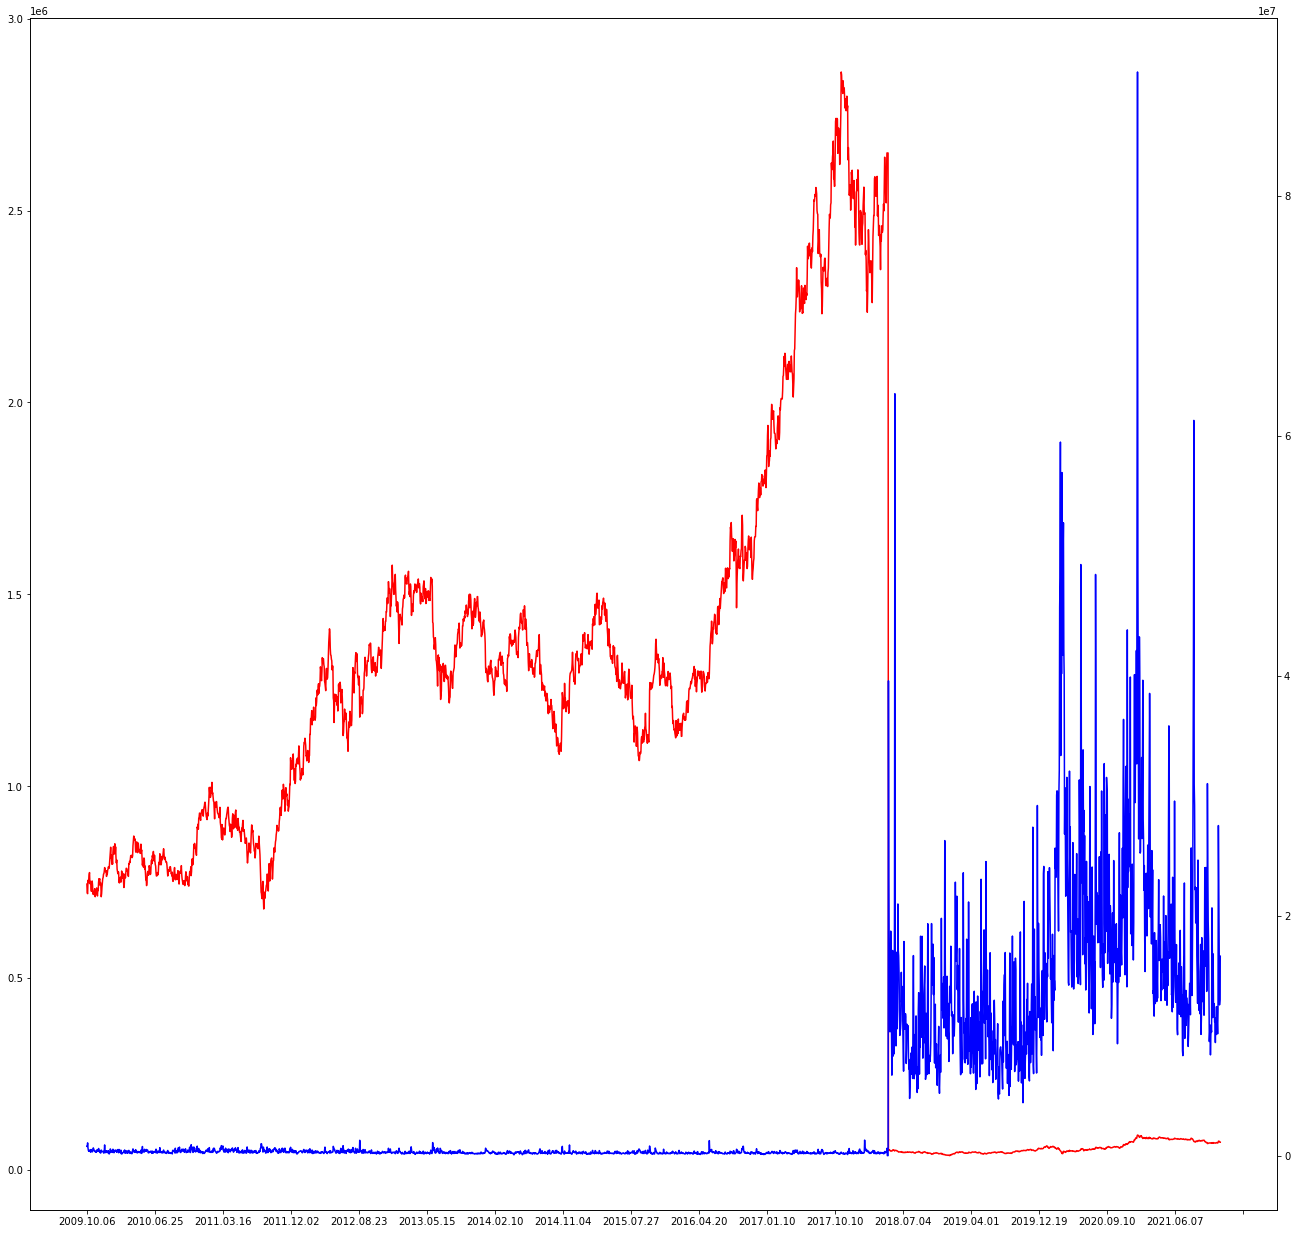

In [11]:
# 중간 마무리 : 삼성전자 주식 그래프로 나타내기
# 참고로, 삼성전자는 2018년 5월 경 액면분할을 해서 시세 자체는 내려갔지만 거래량이 그만큼 늘었다. 이런 변수가 있는 그래프는, 저 시점을 포함한 통계를 내면 안될 것이다.
fig, ax1 = plt.subplots()
ax1.plot(df_profit_1.date, df_profit_1.sise, color='red')
ax1.tick_params(axis='y')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(180))

ax2 = ax1.twinx()
ax2.plot(df_profit_1.date, df_profit_1.trading, color='blue')
ax2.tick_params(axis='y')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(180))

fig.tight_layout()
fig.set_size_inches(20, 20)
plt.show()

**지진과 지진 관련주와의 상관관계**

지진의 세기는 규모로 나타내지만, 실제 피해는 진앙이 얕아야 크게 들어오고, 기삿거리가 된다. 이는 실제 피해 정도인 '진도' 로 나타낼 수 있다.
그러나 기상청 자료개방포털에서는 진도를 표기하지 않았다.

진도는 수정 메르칼리 진도 계급(MMI)를 쓰는데, 최대지반가속도(단위 : g(중력가속도))가 계측기준이므로 규모와 진앙만으로는 진도를 정확히 산출할 수 없지만, 편의상 규모 / 진앙 으로 계산하도록 한다.

국내에서 이슈가 됐었던 지진 사건 중 하나를 추려서, 지진 관련주와의 상관관계를 분석한다.

2016년 9월 12일 : 2016년 경주 지진.

https://ponyozzang.tistory.com/616(인덱스 지정 관련)

In [12]:
# 지진 관련주 3개의 시세 및 거래량 평균 데이터를 만든다.(액면분할에 유의할 것)
df_quake_mean = df_quake_1.copy()

for i in range(len(df_quake_mean)) : 
    df_quake_mean.loc[i, 'sise'] += df_quake_2.loc[i, 'sise'] + df_quake_3.loc[i, 'sise']
    df_quake_mean.loc[i, 'sise'] = int(df_quake_mean.loc[i, 'sise'] / 3)
    df_quake_mean.loc[i, 'trading'] += df_quake_2.loc[i, 'trading'] + df_quake_3.loc[i, 'trading']
    df_quake_mean.loc[i, 'trading'] = int(df_quake_mean.loc[i, 'trading'] / 3)
df_quake_mean.date = pd.to_datetime(df_quake_mean.date)    # 날짜형식을 다른 데이터프레임과 통일시킨다.
print(df_quake_mean)

# 지진 그래프에서, 값을 규모 / 진앙 으로 다시 만든다.
df_quake_process_uni = df_quake_process.copy()
df_quake_process_uni['uni'] = 0  # uni 열 추가
for i in df_quake_process_uni.index : 
    if df_quake_process_uni.loc[i, '진앙'] == 0 : 
        df_quake_process_uni.loc[i, '진앙'] =  1 # 진앙이 0으로 표기되었다면, 대체값은 1로 지정한다.
    df_quake_process_uni.loc[i, 'uni'] = df_quake_process_uni.loc[i, '규모'] / df_quake_process_uni.loc[i, '진앙']

df_quake_process_uni = df_quake_process_uni.reset_index()  # 날짜를 뺀다.
df_quake_process_uni.columns = ['date', '규모', '진앙', 'uni']  # 통일을 위해 날짜 열이름을 바꾼다.

print(df_quake_process_uni)

           date   sise  trading
0    2009-10-06   9963   371150
1    2009-10-07  10063   799601
2    2009-10-08  10385   290012
3    2009-10-09  10493   165746
4    2009-10-12  10930   271115
...         ...    ...      ...
2995 2021-11-23   3058   292896
2996 2021-11-24   3051   315776
2997 2021-11-25   3106   412065
2998 2021-11-26   2990   348986
2999 2021-11-29   2861   370799

[3000 rows x 3 columns]
           date   규모    진앙       uni
0    2012-01-01  2.0   1.0  2.000000
1    2012-01-16  2.2  17.0  0.129412
2    2012-01-19  2.7  13.0  0.207692
3    2012-01-24  2.2  15.0  0.146667
4    2012-02-19  2.7  17.0  0.158824
..          ...  ...   ...       ...
691  2021-11-12  2.1   8.0  0.262500
692  2021-11-16  2.1  13.0  0.161538
693  2021-11-17  2.9  19.0  0.152632
694  2021-11-19  2.2  11.0  0.200000
695  2021-11-22  2.1   7.0  0.300000

[696 rows x 4 columns]


In [13]:
# 지진 그래프에서, 2016년 9월 간의 데이터만 뽑는다.
quake_mask_data = (df_quake_process_uni['date'] >= '2016-09-01') & (df_quake_process_uni['date'] <= '2016-09-30')
df_quake_process_uni_filtered_2016 = df_quake_process_uni.loc[quake_mask_data]
df_quake_process_uni_filtered_2016 = df_quake_process_uni_filtered_2016.reset_index(drop = True)
df_quake_process_uni_filtered_2016 = df_quake_process_uni_filtered_2016.astype({'date' : 'datetime64[ns]'}) # 데이터타입 통일
print(df_quake_process_uni_filtered_2016)
print()

# 지진 관련주 평균 데이터의 2016년 9월 분량을 뽑는다.
quake_mask_sise = (df_quake_mean['date'] >= '2016-09-01') & (df_quake_mean['date'] <= '2016-09-30')
df_quake_mean_filtered_2016 = df_quake_mean.loc[quake_mask_sise]
df_quake_mean_filtered_2016 = df_quake_mean_filtered_2016.reset_index(drop = True)
print(df_quake_mean_filtered_2016)



         date        규모         진앙       uni
0  2016-09-12  2.605769  15.788462  0.165043
1  2016-09-13  2.230435  16.760870  0.133074
2  2016-09-14  2.333333  16.888889  0.138158
3  2016-09-15  2.500000  19.000000  0.131579
4  2016-09-16  2.133333  16.666667  0.128000
5  2016-09-17  2.100000  17.500000  0.120000
6  2016-09-18  2.200000  15.000000  0.146667
7  2016-09-19  2.900000  16.333333  0.177551
8  2016-09-20  2.333333  12.000000  0.194444
9  2016-09-21  2.675000  16.250000  0.164615
10 2016-09-22  2.200000  15.000000  0.146667
11 2016-09-23  2.100000  17.000000  0.123529
12 2016-09-24  2.500000  15.000000  0.166667
13 2016-09-28  2.800000   7.250000  0.386207
14 2016-09-30  2.150000  15.750000  0.136508

         date  sise   trading
0  2016-09-01  2570    197998
1  2016-09-02  2536    277308
2  2016-09-05  2568    128065
3  2016-09-06  2508    142408
4  2016-09-07  2475    134603
5  2016-09-08  2451    238989
6  2016-09-09  2433    142804
7  2016-09-12  2315    200381
8  2016-0





두 데이터의 결측값을 채운다. 주식은 주말마다 장을 닫고, 지진 그래프는 측정되지 않는 경우도 있기 때문이다. 편의상 선형보간을 한다.


http://daplus.net/python-pandas-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%94%84%EB%A0%88%EC%9E%84%EC%97%90-%EB%88%84%EB%9D%BD-%EB%90%9C-%EB%82%A0%EC%A7%9C-%EC%B6%94%EA%B0%80/ (누락된 날짜 추가)


In [14]:
# 지진 데이터부터.
idx = pd.date_range('2016-09-01', '2016-09-30')  # 범위.

s = df_quake_process_uni_filtered_2016.set_index('date') # 인덱스 날짜로 지정.
s

t = s.reindex(idx, fill_value=np.nan) # 빈 날짜 행 추가, 값은 전부 결측치로 지정
t

df_tempp = t.interpolate() # 선형보간
df_tempp

df_data_temp = df_tempp.copy()
#앞쪽 값이 결측치로 계속 남아있으므로, 직접 데이터에서 찾아서 중앙에 위치하는 값을 임의로 넣는다 : 2.2, 15, 0.146667.
for i in range(11) : 
    df_data_temp.iloc[i, 0] = 2
    df_data_temp.iloc[i, 1] = 15
    df_data_temp.iloc[i, 2] = 0.146667

df_data_temp

,규모,진앙,uni
2016-09-01,2.000000,15.000000,0.146667
2016-09-02,2.000000,15.000000,0.146667
2016-09-03,2.000000,15.000000,0.146667
2016-09-04,2.000000,15.000000,0.146667
2016-09-05,2.000000,15.000000,0.146667
2016-09-06,2.000000,15.000000,0.146667
2016-09-07,2.000000,15.000000,0.146667
2016-09-08,2.000000,15.000000,0.146667
2016-09-09,2.000000,15.000000,0.146667
2016-09-10,2.000000,15.000000,0.146667


In [15]:
# 이번엔 주식 테이블이다.

u = df_quake_mean_filtered_2016.set_index('date') # 인덱스 날짜로 지정.
u

v = u.reindex(idx, fill_value=np.nan) # 빈 날짜 행 추가, 값은 전부 결측치로 지정
v

df_sise_temp = v.interpolate() # 선형보간
df_sise_temp



,sise,trading
2016-09-01,2570.000000,1.979980e+05
2016-09-02,2536.000000,2.773080e+05
2016-09-03,2546.666667,2.275603e+05
2016-09-04,2557.333333,1.778127e+05
2016-09-05,2568.000000,1.280650e+05
2016-09-06,2508.000000,1.424080e+05
2016-09-07,2475.000000,1.346030e+05
2016-09-08,2451.000000,2.389890e+05
2016-09-09,2433.000000,1.428040e+05
2016-09-10,2393.666667,1.619963e+05


**프로세싱한 데이터 가시화**

일단 직접 만든 uni, 그리고 시세 값을 날짜별로 차트로 그린다.

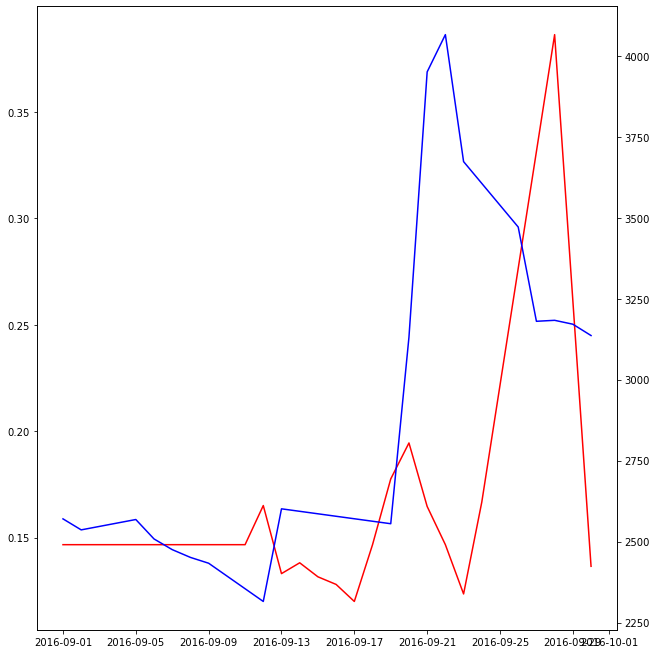

In [16]:
# 가시화. 
fig, ax1 = plt.subplots()
ax1.plot(df_data_temp.index, df_data_temp.uni, color='red')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df_sise_temp.index, df_sise_temp.sise, color='blue')
ax2.tick_params(axis='y')

fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

비슷한 모양새를 그리고 있지만, 사실 높이가 서로 연관된 상황은 아니다. 빨간색이 uni값인데, 이게 뒤에 있는 모양이기 때문이다.

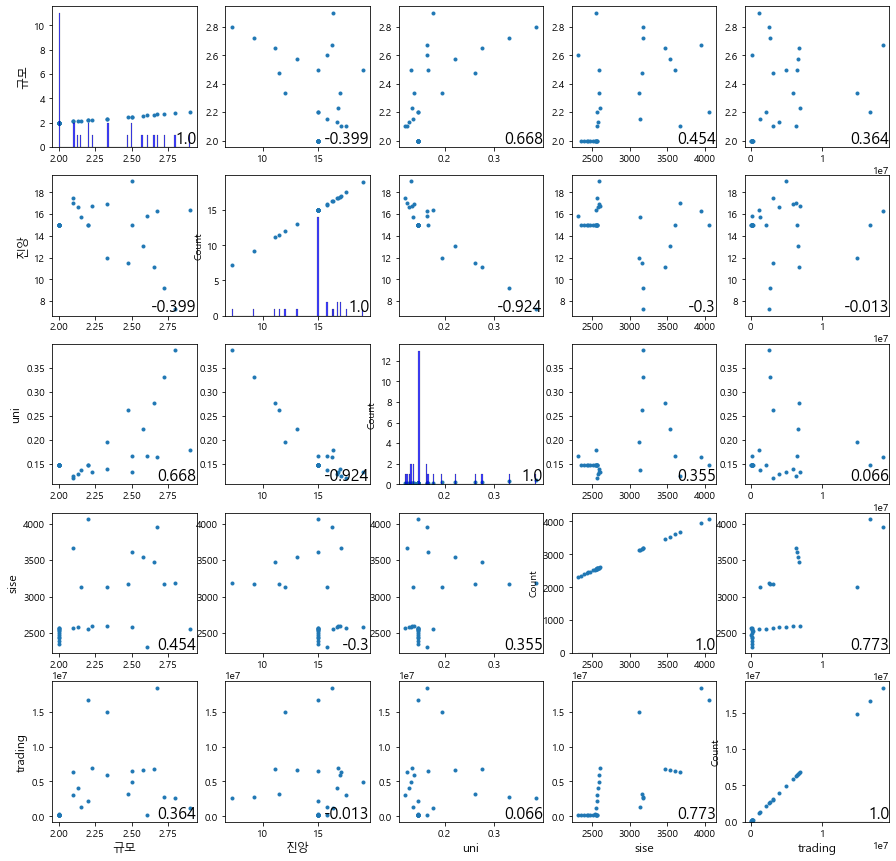

In [17]:
# 두 데이터를 하나로 합친다.
df_quake_final = pd.concat([df_data_temp, df_sise_temp], axis=1) # 합치기
df_quake_final

# 상관관계를 구한다.
df_quake_final_corr = df_quake_final.corr()

df_quake_final_corr



# 그래프로도 그린다. (https://blog.naver.com/PostView.naver?blogId=breezehome50&logNo=222352652567&redirect=Dlog&widgetTypeCall=true&directAccess=false)
import seaborn as sns
import matplotlib as mat


mat.rc('font', family='Malgun Gothic') # 한글깨짐 고치기 https://nakanara.tistory.com/220

fig = plt.figure(figsize=(15,15))

feature = ['규모','진앙','uni','sise', 'trading']

n_feature = len(df_quake_final.columns)

for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature,n_feature,i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df_quake_final, s=9)
        
        if i == j : 
            sns.histplot(df_quake_final[feature[i]].values, bins=100, color="blue")
        
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(df_quake_final_corr.loc[feature[i],feature[j]], 3), xy=(1, 0), 
                    xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', verticalalignment='bottom')
        
plt.show()

시세와 거래량, 그리고 지진 관련 수치들끼리 값을 비교해보면, 규모-시세 값 빼고는 상관계수가 낮게 나오는 것을 확인할 수 있다.(물론 이 값도 높다고는 할 수 없다.)

**상관계수를 좀 더 높여볼 수 있다.**

지진이 관측된 시점과, 그 소식이 뉴스를 타고 투자자들의 귀에 들어가기까지 하루정도 소요되기 때문에, 그 시간만큼 싱크를 맞출 수 있다.
https://itholic.github.io/python-datetime-calculate/ (날짜 연산)

In [18]:
# 지진 그래프에서, 9월 7일부터 10월 6일까지의 데이터를 다시 고른다.
df_quake_process_uni_temp = df_quake_process_uni.copy()
df_quake_process_uni_temp = df_quake_process_uni_temp.astype({'date' : 'datetime64[ns]'}) # 데이터타입 통일

sync_mask = (df_quake_process_uni_temp['date'] >= '2016-09-07') & (df_quake_process_uni_temp['date'] <= '2016-10-6')
df_data_temp_sync = df_quake_process_uni_temp.loc[sync_mask]
df_data_temp_sync = df_data_temp_sync.reset_index(drop = True)

import datetime
from datetime import timedelta

for i in range(len(df_data_temp_sync)) : 
    df_data_temp_sync.loc[i, 'date'] += datetime.timedelta(days=1)
    
# 선형보간도 다시 한다.
idx = pd.date_range('2016-09-01', '2016-09-30')  # 범위.

a = df_data_temp_sync.set_index('date') # 인덱스 날짜로 지정.
a

b = a.reindex(idx, fill_value=np.nan) # 빈 날짜 행 추가, 값은 전부 결측치로 지정
b

c = b.interpolate() # 선형보간
c

df_data_synced = c.fillna(2.2) # 보간 안되는 값은 평균에 근접한 임의의 값으로 직접 지정.

for i in range(11) : 
    df_data_synced.iloc[i, 1] = 15
    df_data_synced.iloc[i, 2] = 0.146667


df_data_synced

,규모,진앙,uni
2016-09-01,2.200000,15.000000,0.146667
2016-09-02,2.200000,15.000000,0.146667
2016-09-03,2.200000,15.000000,0.146667
2016-09-04,2.200000,15.000000,0.146667
2016-09-05,2.200000,15.000000,0.146667
2016-09-06,2.200000,15.000000,0.146667
2016-09-07,2.200000,15.000000,0.146667
2016-09-08,2.200000,15.000000,0.146667
2016-09-09,2.200000,15.000000,0.146667
2016-09-10,2.200000,15.000000,0.146667


이번엔, 좀 더 극적인 효과를 볼 수 있는 규모와 거래량 간의 데이터를 그래프로 그려보도록 한다.

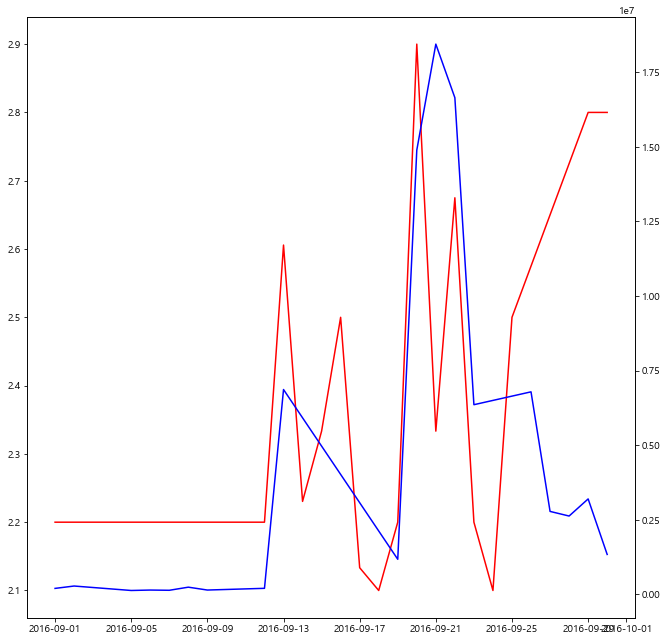

In [19]:
# 다시 가시화.
fig, ax1 = plt.subplots()
ax1.plot(df_data_synced.index, df_data_synced.규모, color='red')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df_sise_temp.index, df_sise_temp.trading, color='blue')
ax2.tick_params(axis='y')

fig.tight_layout()
fig.set_size_inches(10, 10)
plt.show()

등락이 많이 겹치는 것을 확인할 수 있다.

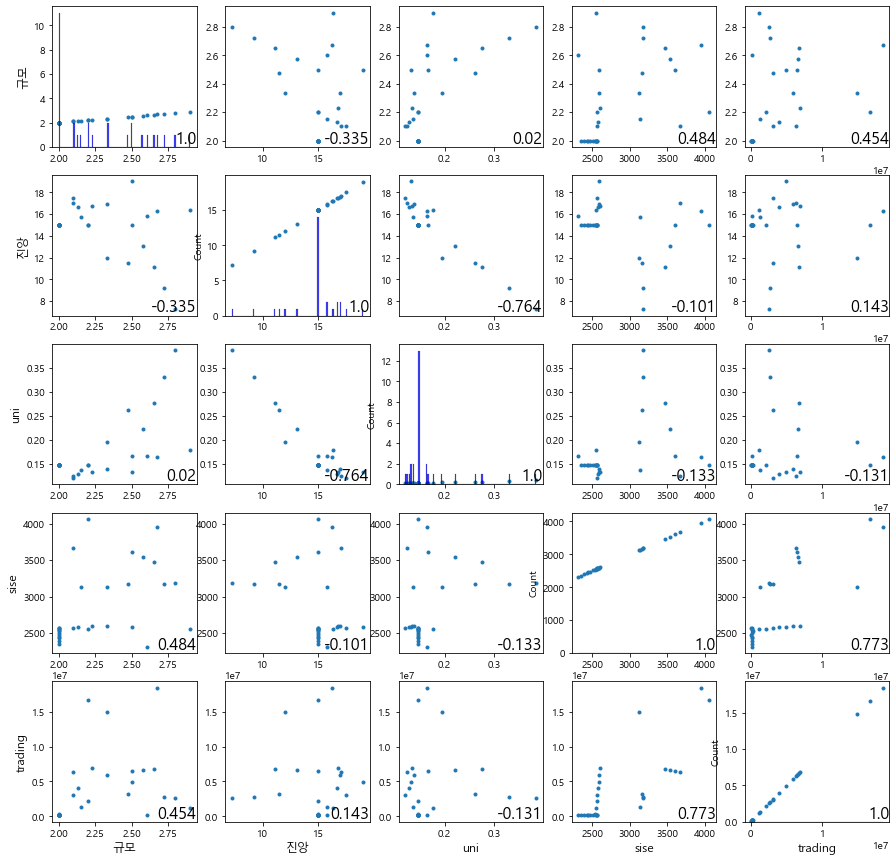

In [20]:
# 이걸 다시 합치고, 상관계수 구하기.
df_quake_sync_final = pd.concat([df_data_synced, df_sise_temp], axis=1) # 합치기
df_quake_sync_final

df_quake_sync_final_corr = df_quake_sync_final.corr()

df_quake_sync_final_corr



# 그래프.
fig = plt.figure(figsize=(15,15))

feature = ['규모','진앙','uni','sise', 'trading']

n_feature = len(df_quake_sync_final.columns)

for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature,n_feature,i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df_quake_final, s=9)
        
        if i == j : 
            sns.histplot(df_quake_final[feature[i]].values, bins=100, color="blue")
        
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(df_quake_sync_final_corr.loc[feature[i],feature[j]], 3), xy=(1, 0), 
                    xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', verticalalignment='bottom')
        
plt.show()

규모 쪽 상관계수가 이전에 비해 증가한 것을 확인할 수 있다.

그러나 uni, 진앙 값의 상관계수는 오히려 줄어들었다.

값 간의 연관성을 따졌을 때 이 쪽 그래프가 더 정확하다는 점으로 미뤄보아, 특히 뉴스에 주로 언급되는 규모가 투자자들의 뇌리에 각인되어 거래량에 일정 수준의 연관성을 갖게 한 것으로 추정할 수 있다.

참고 : https://www.google.com/search?q=%EC%A7%80%EC%A7%84+%EB%89%B4%EC%8A%A4

앞으로 나오는 상관계수 값들에 대해서도 계속 0.5 밑으로 나오겠지만, 이유는 날씨에 관한 값들은 이슈가 됐을 때를 트리거 삼아서 투자자들이 몰리기 때문이다. 따라서 해당 날씨 값이 잠잠해지더라도 며칠, 혹은 몇 주 까지도 투자자들이 관심을 가질 수 있으며, 거시적으로 보면 작전세력들의 개입에 의해서도 주가가 변동되기 때문에 이정도 상관계수가 나오는 것이라고 판단할 수 있을 것이다.

**폭염과 냉방장치 관련주의 상관관계**

대한민국 기상청에서는 5~9월 사이에 체감온도 33℃ 이상이 이틀간 지속되는 경우를 폭염주의보 발령기준으로 삼고 있다.

간편한 불쾌지수 계산식은 1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32 이다. (http://www.psychiatricnews.net/news/articleView.html?idxno=10116)

2018년에 폭염으로 인한 이슈가 많았으므로, 해당 연도에서 5~9월 사이의 실제 및 체감온도 데이터를 이용해 폭염 관련주와의 상관관계를 분석한다.


(추가적으로, 상관관계가 적게 나온 경우가 있다면 해당 주식이 날씨데이터 외적으로 어떤 요소와 상관관계를 갖는지도 알아볼 것)

In [21]:
# 불쾌지수 계산식을 이용해서 데이터프레임을 만든다.
df_weather_process_feel = df_weather_process.copy()
df_weather_process_feel['불쾌지수'] = 0

for i in range(len(df_weather_process_feel)) : 
    temprature = df_weather_process_feel.iloc[i, 0]
    humidity = df_weather_process_feel.iloc[i, 3] / 100
    df_weather_process_feel.iloc[i, 6] = 1.8 * temprature - 0.55 * (1 - humidity) * (1.8 * temprature - 26) + 32
    

# 평균기온, 최고기온, 불쾌지수 3개만 남기고 나머지 열은 없앤다.
df_hot_tempman = df_weather_process_feel.drop(['평균 풍속(m/s)', '평균 현지기압(hPa)', '평균 상대습도(%)', '합계 일사량(MJ/m2)'], axis=1)

# 인덱스에 들어간 날짜를 다시 복구시키고, 자료형을 날짜로 바꾼다.
df_hot_tempman = df_hot_tempman.reset_index()
df_hot_tempman.일시 = pd.to_datetime(df_hot_tempman.일시)
df_hot_tempman = df_hot_tempman.astype({'일시' : 'datetime64[ns]'})
df_hot_tempman.columns = ['date', '평균기온', '최고기온', '불쾌지수']

# 폭염 관련주 3개의 시세 및 거래량 평균 데이터를 만든다.(액면분할에 유의할 것)
df_hot_mean = df_hot_1.copy()

for i in range(len(df_hot_mean)) : 
    df_hot_mean.loc[i, 'sise'] += df_hot_2.loc[i, 'sise'] + df_hot_3.loc[i, 'sise']
    df_hot_mean.loc[i, 'sise'] = int(df_hot_mean.loc[i, 'sise'] / 3)
    df_hot_mean.loc[i, 'trading'] += df_hot_2.loc[i, 'trading'] + df_hot_3.loc[i, 'trading']
    df_hot_mean.loc[i, 'trading'] = int(df_hot_mean.loc[i, 'trading'] / 3)
df_hot_mean.date = pd.to_datetime(df_hot_mean.date)    # 날짜형식을 다른 데이터프레임과 통일시킨다.


print(df_hot_tempman)
print(df_hot_mean)

           date       평균기온       최고기온       불쾌지수
0    2017-11-01  13.500000  18.433333  56.590473
1    2017-11-02  14.766667  18.533333  58.510458
2    2017-11-03  13.533333  18.733333  56.665477
3    2017-11-04   8.533333  13.700000  49.878311
4    2017-11-05   8.266667  15.666667  49.440565
...         ...        ...        ...        ...
1505 2021-12-15   6.633333  11.733333  45.648993
1506 2021-12-16   5.966667   8.966667  44.684378
1507 2021-12-17  -2.833333   5.433333  37.134492
1508 2021-12-18  -5.200000  -0.633333  31.449944
1509 2021-12-19   0.166667   4.866667  38.646615

[1510 rows x 4 columns]
           date  sise  trading
0    2009-10-06  2641  6241657
1    2009-10-07  2586  4609762
2    2009-10-08  2821  1473003
3    2009-10-09  2658  5567239
4    2009-10-12  2691  3666820
...         ...   ...      ...
2995 2021-11-23  9711  3199715
2996 2021-11-24  9755  1869415
2997 2021-11-25  9660  1451332
2998 2021-11-26  9416  1377657
2999 2021-11-29  9091  1365648

[3000 rows x 3

In [22]:
# 2018년의 5~9월 체감온도 데이터를 뽑는다.

df_hot_data = df_hot_tempman[df_hot_tempman['date'].between('2018-05-01', '2018-09-30')].copy()
df_hot_data.reset_index(drop=True,inplace=True)


# 폭염 관련주 평균 데이터의 2018년 5~9월 분량을 뽑는다. 이번엔 보간까지 여기서 완료한다.
df_hot_sise = df_hot_mean[df_hot_mean['date'].between('2018-05-01', '2018-09-30')].copy()
df_hot_sise.reset_index(drop=True, inplace=True)

# 잠시 date를 인덱스로 둬서 보간을 완료한 뒤, 이걸 푸는 식으로 작업한다.
temp = df_hot_sise.set_index('date')
range_temp = pd.date_range('2018-05-01', '2018-09-30')
temp = temp.reindex(range_temp, fill_value=np.nan)
temp = temp.interpolate()
temp = temp.fillna(method='bfill')
df_hot_sise_bogan = temp.reset_index()
df_hot_sise_bogan.columns = ['date', 'sise', 'trading']
df_hot_sise_bogan

,date,sise,trading
0,2018-05-01,4948.00,612595.00
1,2018-05-02,4948.00,612595.00
2,2018-05-03,4988.00,556699.00
3,2018-05-04,4898.00,429574.00
4,2018-05-05,4857.25,495397.75
...,...,...,...
148,2018-09-26,4920.50,281946.00
149,2018-09-27,4938.00,303301.00
150,2018-09-28,4936.00,375705.00
151,2018-09-29,4936.00,375705.00


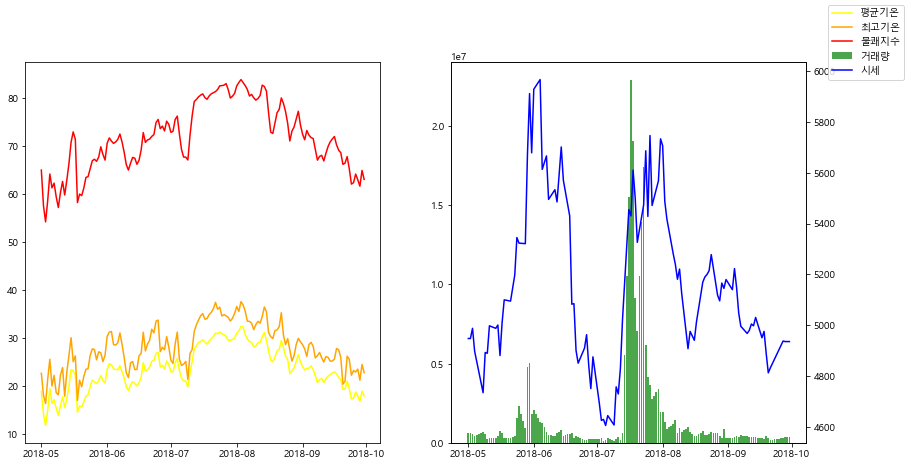

In [23]:
# 이 자료들을 전부 그래프로 그린다. 거래량만 바로, 나머지는 선으로.

fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(14, 7))
ax[0].plot(df_hot_data['date'],df_hot_data['평균기온'], color='yellow', label='평균기온') # 평균기온
ax[0].plot(df_hot_data['date'], df_hot_data['최고기온'], color='orange', label='최고기온') # 최고기온
ax[0].plot(df_hot_data['date'], df_hot_data['불쾌지수'], color='red', label='불쾌지수') # 불쾌지수

ax2 = ax[1].twinx()
ax2.plot(df_hot_sise_bogan['date'], df_hot_sise_bogan['sise'], color='blue', label='시세') # 시세
ax[1].bar(df_hot_sise_bogan['date'], df_hot_sise_bogan['trading'], color='green', alpha=0.7, label='거래량') # 거래량

fig.legend()



plt.show()

좌측의 기온 관련 그래프는, 평균기온/최고기온/불쾌지수 모두 같은 모습을 하고 있다.
우측의 시세 그래프는 좌측의 기온 관련 그래프와 메이저한 등락이 다소 비슷한 점을 확인할 수 있다.

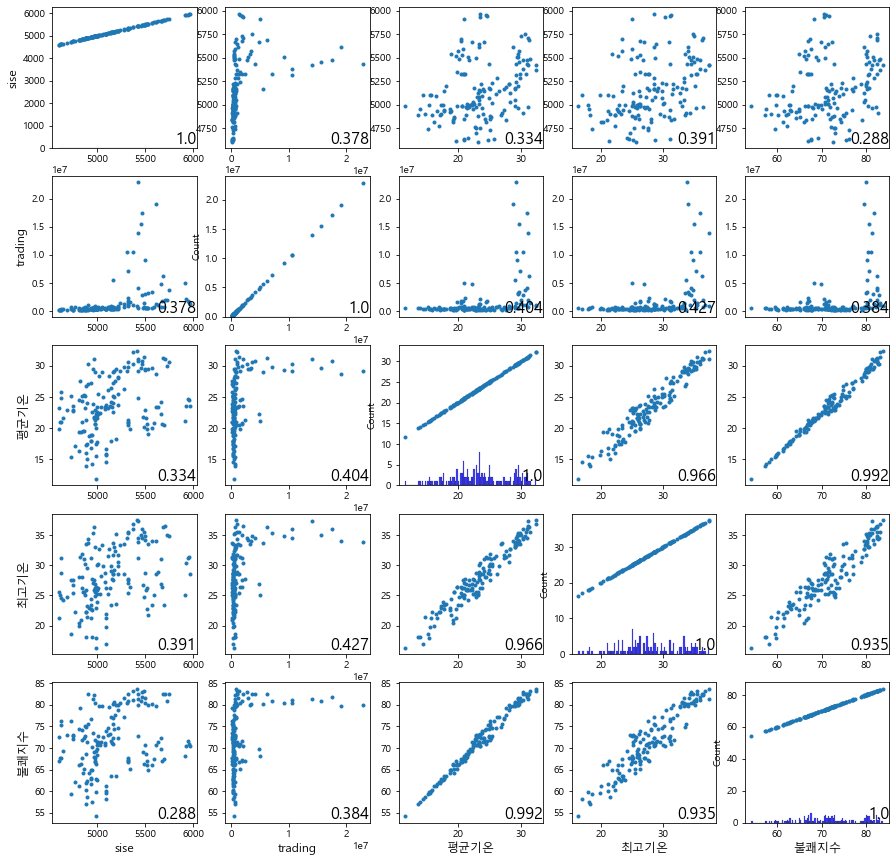

In [24]:
# 두 데이터의 상관관계를 구한다.

# 먼저 합친다.
df_hot_final = pd.merge(df_hot_sise_bogan, df_hot_data)
df_hot_final
df_hot_corr = df_hot_final.corr()
df_hot_corr

fig = plt.figure(figsize=(15,15))

feature = ['sise','trading','평균기온','최고기온', '불쾌지수']

n_feature = len(df_hot_final.columns) - 1

for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature,n_feature,i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df_hot_final, s=9)
        
        if i == j : 
            sns.histplot(df_hot_final[feature[i]].values, bins=100, color="blue")
        
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(df_hot_corr.loc[feature[i],feature[j]], 3), xy=(1, 0), 
                    xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', verticalalignment='bottom')
        
plt.show()

이 경우에도, 최고기온이 시세 및 거래량에 대해 0.4 수준의 상관관계를 갖고 있음을 알 수 있다.

물론 폭염은 매년 발생하기 때문에 상대적으로 상관계수가 밀리는 경향을 보이지만, 반대로 불쾌지수 값도 거래량에 대해선 0.38 수준의 상관관계를 확보하는 등의 특징이 있다.

**번외 : 예측모델 만들기**

표본과 신뢰도에 대해, 과연 기상환경 만으로 시세, 거래량을 바로 예측할 수 있을 지에 대해 확인해본다.

In [46]:
# 최고기온과 거래량 데이터만 뽑기 : 2018년 5월~9월의 자료를 가져와서 학습해본다.

# 먼저 시세부터.
df_learn_X = df_hot_final.copy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df_learn_y = df_learn_X.sise
df_learn_X = df_learn_X.drop(['sise', 'date','평균기온', 'trading'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_learn_X, df_learn_y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_prediction =  LR.predict(X_test)
y_prediction

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))

r2 socre is 0.1915
root_mean_squared error of is 318.89


In [47]:
# 이번엔 거래량을 본다.
df_learn_X = df_hot_final.copy()

df_learn_y = df_learn_X.trading
df_learn_X = df_learn_X.drop(['trading', 'date', '평균기온', 'sise'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_learn_X, df_learn_y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_prediction =  LR.predict(X_test)
y_prediction

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))

r2 socre is 0.1849
root_mean_squared error of is 3688501.39


각각 0.18 수준의 매우 낮은 정확도를 보이고 있다.

즉 기온 값 만으로는 수익을 정확히 예측할 수 없다는 뜻이 된다.

**일조량 및 기압과 주식 수익률의 상관관계**

사람은 햇빛을 받아야 건강해지며 삶의 활기를 되찾는다고 한다. 우울증을 치료하는 방법 중 하나도 밖에 나가 햇빛을 쬐는 것이다. 이 일조량이 주식 수익률에도 영향을 미치는지를 분석할 수 있다. 이 또한 상관관계를 이용해 구해본다.

추가로, 사람의 기분이 좋다/나쁘다를 기압으로 이야기하기도 한다. 이것에 연관된 기상병이라는 것도 있는 만큼, 기압이 기분에 영향을 미치고, 이것이 다시 주식 수익률에도 영향을 미치는지를 확인해볼 수 있을 것이다.(https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kma_131&logNo=221012147402)


단, 카카오는 2021.04.15.에 액면분할을 했고, 삼성은 2018.05.06. 에 액면분할을 했기 때문에, 이 둘을 의식해서 2018년 6월부터 2021년 3월까지의 지표들을 갖고 분석을 시도해볼 수 있을 것이다. 또한, 이 경우에는 좀 더 다양성을 추구하기 위해 다른 주제에서의 모든 값들을 전부 합칠 것이다.


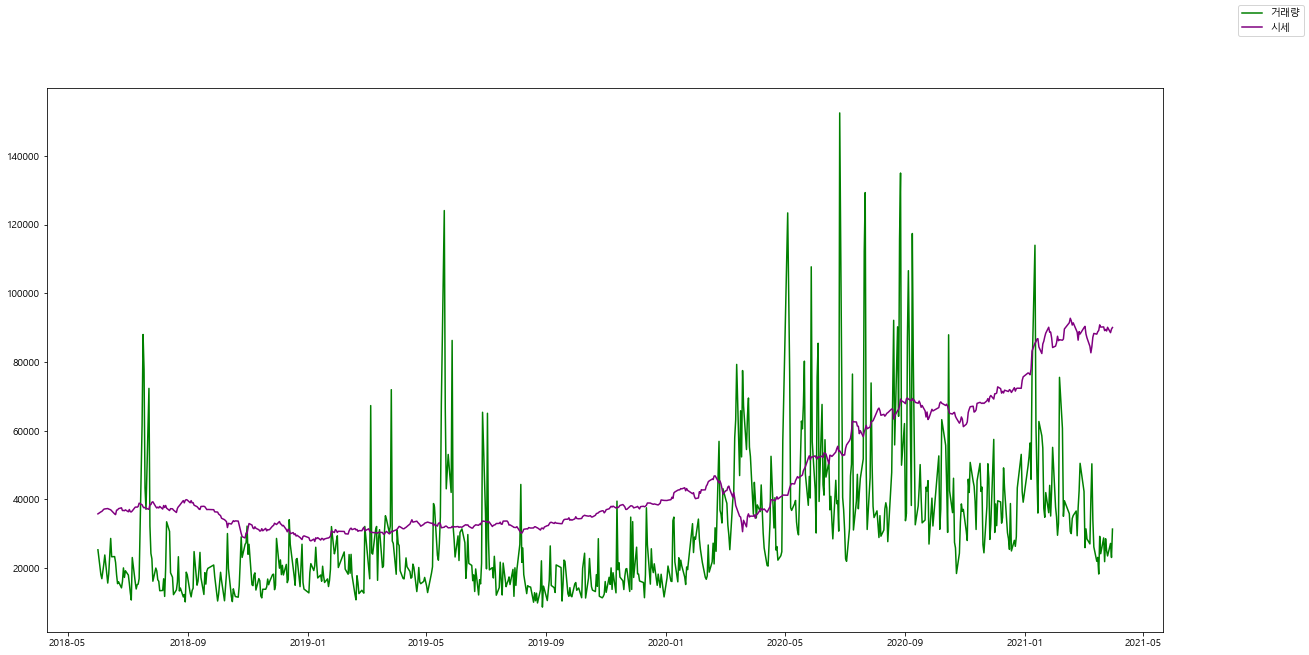

In [27]:
# 모든 주식 데이터의 2018년 6월 ~ 2021년 3월까지의 평균 시세 및 거래량을 만든다.
df_profit_make = pd.concat([df_profit_1, df_profit_2, df_profit_3, df_hot_1, df_hot_2, df_hot_3, df_quake_1, df_quake_2, df_quake_3], ignore_index=True)
df_profit_make = df_profit_make.groupby('date').mean() # 일자별 평균
df_profit_make = df_profit_make.reset_index() # 인덱스 재정렬
df_profit_make.columns=['date', 'sise', 'trading'] # 열이름 변경
df_profit_make['date'] = pd.to_datetime(df_profit_make['date']) # date 열 형식 변경
df_profit_make = df_profit_make[df_profit_make['date'].between('2018-06-01', '2021-03-31')] # 날짜범위 값만 추리기
df_profit_make = df_profit_make.reset_index(drop=True) # 인덱스 재정렬, 이번에 나오는 값은 제끼기

# 거래량이 너무 높은 관계로, 시세와 비슷한 수준으로 내린다.(그래프 그릴 때 용이함)
for i in range(len(df_profit_make)) : 
    df_profit_make.loc[i, 'trading'] = df_profit_make.loc[i, 'trading'] / 100
    df_profit_make.loc[i, 'sise'] = df_profit_make.loc[i, 'sise']
    if(df_profit_make.loc[i, 'trading'] < 0) : print('이상치 발생')

# 결측값을 채운다.
temp = df_profit_make.set_index('date')
range_temp = pd.date_range('2018-06-01', '2021-03-31')
temp = temp.reindex(range_temp, fill_value=np.nan)
temp = temp.interpolate()
temp = temp.fillna(method='bfill')
df_profit_unite = temp.reset_index()
df_profit_unite.columns = ['date', 'sise', 'trading']


# int 형변환
for i in range(len(df_profit_unite)) : 
    df_profit_unite.loc[i, 'sise'] =  (int)(df_profit_unite.loc[i, 'sise'])
    df_profit_unite.loc[i, 'trading'] = (int)(df_profit_unite.loc[i, 'trading'])
df_profit_unite

# 그래프
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_profit_unite['date'], df_profit_unite['trading'], color='green', label='거래량')
ax.plot(df_profit_unite['date'], df_profit_unite['sise'], color='purple', label='시세')
fig.legend()

plt.show()


In [28]:
# 2018년 6월 ~ 2021년 3월까지의 일조량 및 기압 자료를 추출한다.
df_profit_data = df_weather_process.copy()
df_profit_data = df_profit_data.reset_index()
df_profit_data = df_profit_data[df_profit_data['일시'].between('2018-06-01', '2021-03-31')]
df_profit_data = df_profit_data.reset_index(drop=True)
df_profit_data = df_profit_data.drop(['평균기온(°C)', '최고기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)'],axis=1)
df_profit_data.columns = ['date', '기압', '일사량']
df_profit_data['date'] = pd.to_datetime(df_profit_data['date'])
df_profit_data

,date,기압,일사량
0,2018-06-01,1008.000000,27.346667
1,2018-06-02,1007.966667,27.203333
2,2018-06-03,1006.366667,26.193333
3,2018-06-04,1005.933333,20.896667
4,2018-06-05,1005.400000,20.856667
...,...,...,...
1030,2021-03-27,1005.200000,5.603333
1031,2021-03-28,995.900000,9.270000
1032,2021-03-29,1000.800000,18.446667
1033,2021-03-30,1005.700000,22.466667


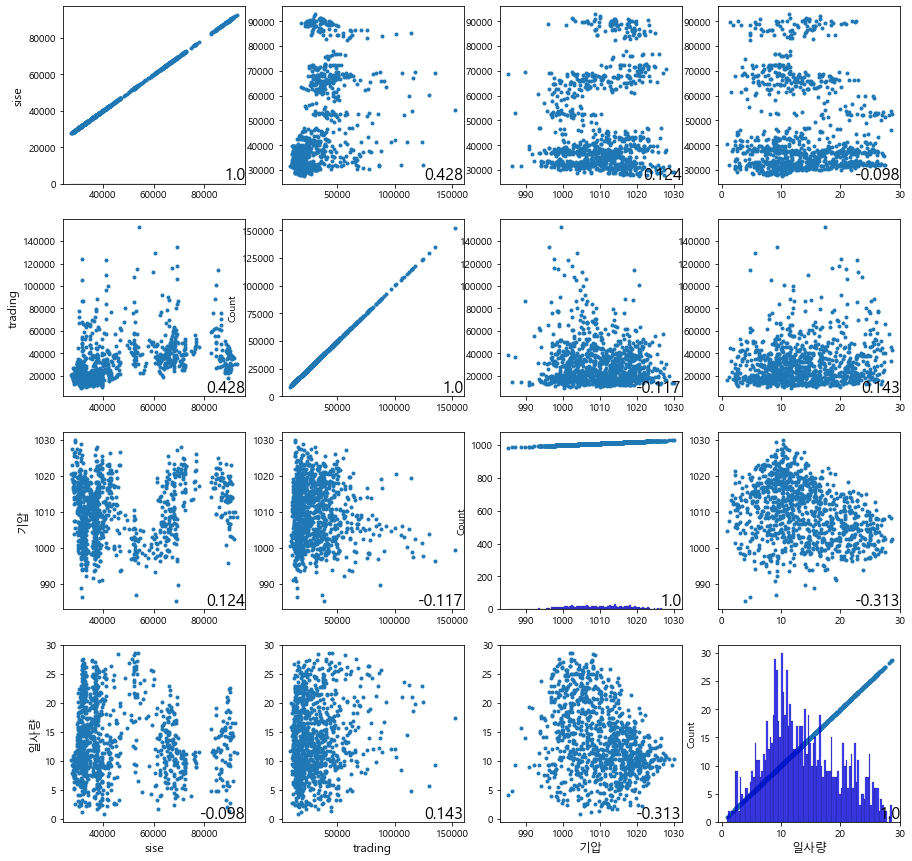

In [29]:
# 두 데이터를 합치고, 상관계수를 구한다.
df_profit_final = pd.merge(df_profit_unite, df_profit_data)
df_profit_corr = df_profit_final.corr()
df_profit_corr

fig = plt.figure(figsize=(15,15))

feature = ['sise','trading','기압','일사량']

n_feature = len(df_profit_final.columns)-1


for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature,n_feature,i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df_profit_final, s=9)
        
        if i == j : 
            sns.histplot(df_profit_final[feature[i]].values, bins=100, color="blue")
        
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(df_profit_corr.loc[feature[i],feature[j]], 3), xy=(1, 0), 
                    xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', verticalalignment='bottom')
        
plt.show()

**통계적으로 유의미한 값을 찾지 못했다.**

이에 대한 설명은 레퍼런스 를 보면 도움이 될 것이다(https://www.koreascience.or.kr/article/JAKO199608508077342.pdf) : 상승기와 침체기 등 주가변동이 급변하는 때에 상관관계가 보이지만, 이렇게 연 단위의 지표를 갖고 분석하기엔 어려움이 따른다는 것.

이를 위해 한달 단위로 하나를 살펴보도록 한다 : 코로나가 사회적 이슈로 떠오르고 많은 국가들이 국경을 폐쇄하기 시작했던 2020년 3월 한달 간의 지표만을 살펴본다.

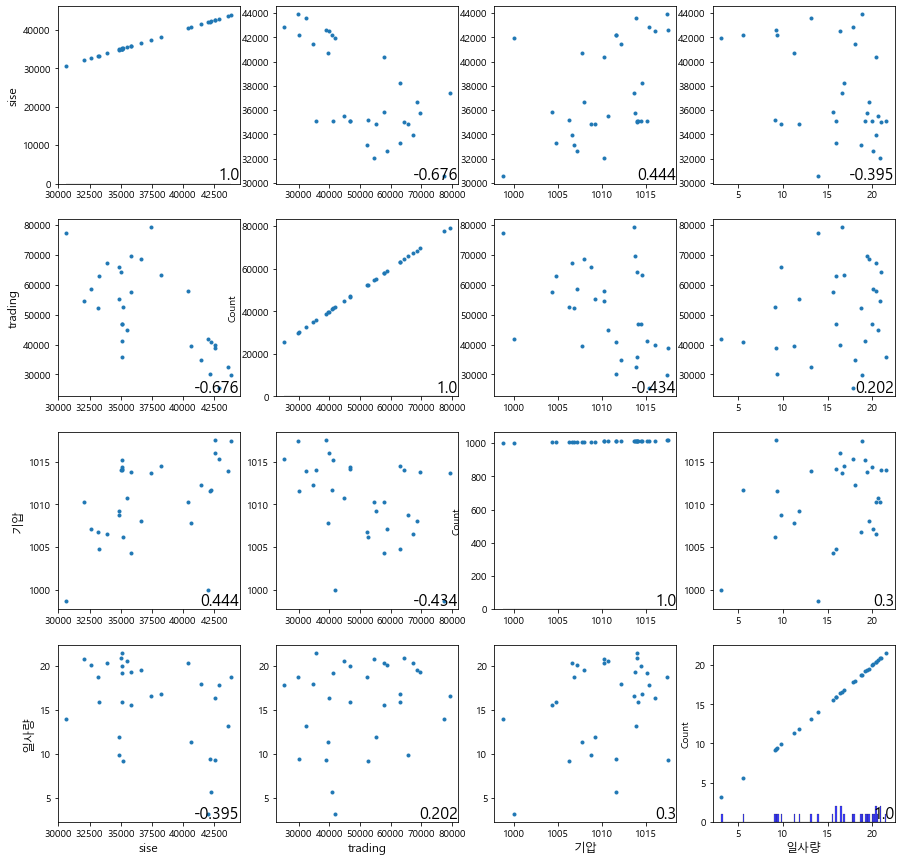

In [30]:
# 2020년 5월의 데이터만 추려서 다시 검사한다.
df_profit_final_v2 = df_profit_final.copy()
df_profit_final_v2 = df_profit_final_v2[df_profit_final_v2['date'].between('2020-03-01', '2020-03-31')]
df_profit_final_v2.reset_index(drop=True)
df_profit_final_v2_corr = df_profit_final_v2.corr()
df_profit_final_v2_corr



fig = plt.figure(figsize=(15,15))

feature = ['sise','trading','기압','일사량']

n_feature = len(df_profit_final_v2.columns)-1


for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature,n_feature,i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df_profit_final_v2, s=9)
        
        if i == j : 
            sns.histplot(df_profit_final_v2[feature[i]].values, bins=100, color="blue")
        
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(df_profit_final_v2_corr.loc[feature[i],feature[j]], 3), xy=(1, 0), 
                    xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', verticalalignment='bottom')
        
plt.show()

혼란의 시기였던 만큼 기압과 일사량이 시세 및 거래량에 상관관계를 지니게 되었으며, 특히 일사량보단 기압이 좀 더 높은 상관관계를 갖고 있음을 파악할 수 있다.